# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
from citipy import citipy
import matplotlib.pyplot as plt
import requests
import pandas as pd 
from pprint import pprint
import numpy as np
import os
from sklearn import datasets
from scipy.stats import linregress
from api_keys import weather_api_key

## Generate Cities List

In [4]:
#Do not Write in this cell!

In [40]:
#Write here!!!!
url = "http://api.openweathermap.org/data/2.5/weather?lat="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Do not Write in this cell!

In [7]:
#Write here!!!!

data = pd.read_csv('../Instructions/output_data/cities.csv')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Do not Write in this cell!
data.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [9]:
#Write here!!!!
data.describe()

,City_ID,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,548.000000,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,273.500000,49.405109,1.558379e+09,67.671533,19.665146,20.675529,64.970785,8.672682
std,158.338246,36.914201,7.820486e+01,23.697626,33.623560,90.307948,18.704318,5.865974
min,0.000000,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,136.750000,13.750000,1.558379e+09,52.000000,-6.267500,-61.015000,53.970000,4.680000
50%,273.500000,46.500000,1.558379e+09,71.000000,21.390000,21.240000,64.990000,7.010000
75%,410.250000,81.000000,1.558379e+09,86.000000,47.887500,102.937500,80.600000,11.410000
max,547.000000,100.000000,1.558379e+09,290.000000,78.220000,179.320000,104.100000,46.080000


In [10]:
#Do not Write in this cell!

In [11]:
#Write here!!!!

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#Do not Write in this cell!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     548 non-null    int64  
 1   City        548 non-null    object 
 2   Cloudiness  548 non-null    int64  
 3   Country     544 non-null    object 
 4   Date        548 non-null    int64  
 5   Humidity    548 non-null    int64  
 6   Lat         548 non-null    float64
 7   Lng         548 non-null    float64
 8   Max Temp    548 non-null    float64
 9   Wind Speed  548 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 42.9+ KB


In [13]:
#Write here!!!!

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
##This graph shows higher temperatures closer to the equator and descresing temperatures as the latitude moves further away
from the equator.

Text(0, 0.5, 'Max Temperature (F)')

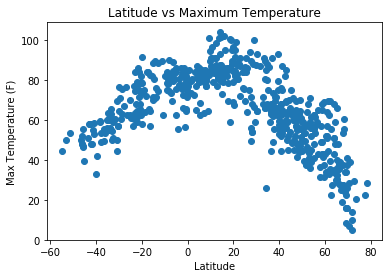

In [14]:
plt.scatter(data['Lat'], data['Max Temp'])
plt.title('Latitude vs Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

## Latitude vs. Humidity Plot

In [ ]:
## This plot shows us that latitude coordinates between 20 and 40 have a low percentage of humidity.

Text(0, 0.5, 'Humidity (%)')

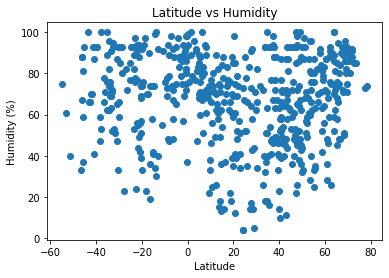

In [15]:
temp_data = data[data.Humidity < 200]
plt.scatter(temp_data['Lat'], temp_data['Humidity'])
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

## Latitude vs. Cloudiness Plot

In [ ]:
##This plot of Latitude vs Cloudiness Plot shows an decrease in cloudiness at the points further away from the equator.

Text(0, 0.5, 'Cloudiness (%)')

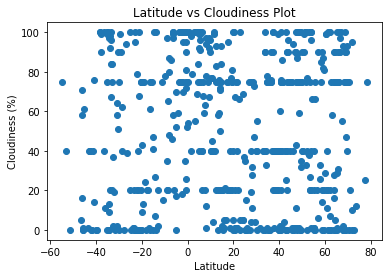

In [17]:
plt.scatter(data['Lat'], data['Cloudiness'], )
plt.title('Latitude vs Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

## Latitude vs. Wind Speed Plot

In [ ]:
## This plot shows that the higher wind speeds are further from equator.

Text(0, 0.5, 'Windspeed (mph)')

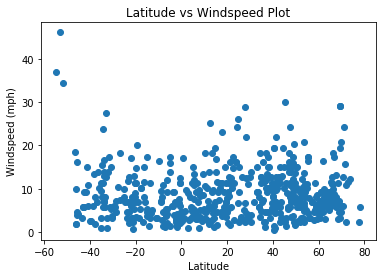

In [19]:
plt.scatter(data['Lat'], data['Wind Speed'], )
plt.title('Latitude vs Windspeed Plot')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')

## Linear Regression

In [22]:
data.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [41]:
north_df = northern_hem = data[data.Lat >= 0]
south_df = southern_hem = data[data.Lat < 0]
northern_hem.shape, southern_hem.shape
north_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [53]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 


  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "b", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "red") 
  
    # putting labels 
    plt.xlabel('Temperature (F)') 
    plt.ylabel('Latitude (%)') 
  
    # function to show plot 
    plt.show() 
  

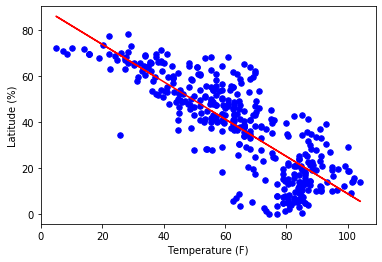

In [54]:
X = np.array(list(northern_hem['Max Temp']))
y = northern_hem['Lat']


b = estimate_coef(X, y)
plot_regression_line(X, y, b) 




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
X = np.array(list(southern_hem['Max Temp']))
y = southern_hem['Lat']


b = estimate_coef(X, y)
plot_regression_line(X, y, b) 
 # plotting the regression line 
plt.plot(X, y, "red") 
 # putting labels 
plt.xlabel('Temperature (F)') 
plt.ylabel('Latitude (%)') 
plt.show()





####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

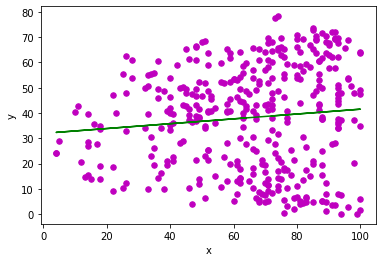

In [29]:
X = np.array(list(northern_hem['Humidity']))
y = northern_hem['Latitude (%)']


b = estimate_coef(X, y)
plot_regression_line(X, y, b) 


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

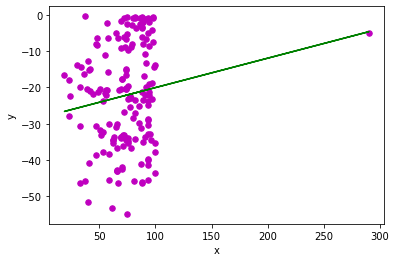

In [31]:
X = np.array(list(southern_hem['Humidity']))
y = southern_hem['Lat']


b = estimate_coef(X, y)
plot_regression_line(X, y, b) 


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

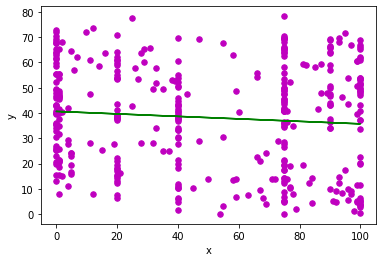

In [33]:
X = np.array(list(northern_hem['Cloudiness']))
y = northern_hem['Lat']


b = estimate_coef(X, y)
plot_regression_line(X, y, b) 


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

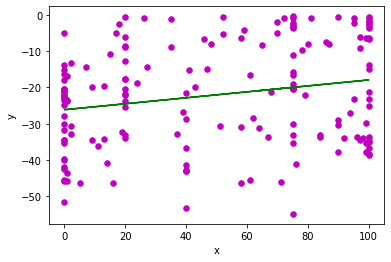

In [35]:
X = np.array(list(southern_hem['Cloudiness']))
y = southern_hem['Lat']


b = estimate_coef(X, y)
plot_regression_line(X, y, b) 


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

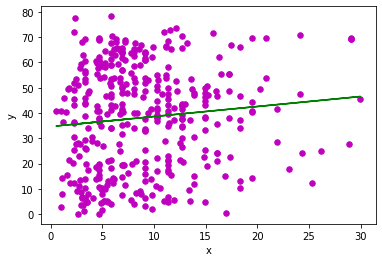

In [37]:
X = np.array(list(northern_hem['Wind Speed']))
y = northern_hem['Lat']


b = estimate_coef(X, y)
plot_regression_line(X, y, b) 


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

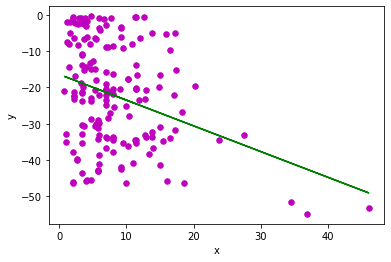

In [38]:
X = np.array(list(southern_hem['Wind Speed']))
y = southern_hem['Lat']


b = estimate_coef(X, y)
plot_regression_line(X, y, b) 


In [39]:
#Write here!!!!